In [2]:
import pandas as pd

df = pd.read_csv("Air_Quality.csv")

print(df)

       Unique ID  Indicator ID                                   Name  \
0         179772           640  Boiler Emissions- Total SO2 Emissions   
1         179785           640  Boiler Emissions- Total SO2 Emissions   
2         178540           365                Fine particles (PM 2.5)   
3         178561           365                Fine particles (PM 2.5)   
4         823217           365                Fine particles (PM 2.5)   
...          ...           ...                                    ...   
18020     816914           643          Annual vehicle miles traveled   
18021     816913           643          Annual vehicle miles traveled   
18022     816872           643          Annual vehicle miles traveled   
18023     816832           643          Annual vehicle miles traveled   
18024     151658           643          Annual vehicle miles traveled   

              Measure     Measure Info Geo Type Name  Geo Join ID  \
0      Number per km2           number         UHF42  

In [3]:
print(df.head(3))

   Unique ID  Indicator ID                                   Name  \
0     179772           640  Boiler Emissions- Total SO2 Emissions   
1     179785           640  Boiler Emissions- Total SO2 Emissions   
2     178540           365                Fine particles (PM 2.5)   

          Measure Measure Info Geo Type Name  Geo Join ID  \
0  Number per km2       number         UHF42        409.0   
1  Number per km2       number         UHF42        209.0   
2            Mean       mcg/m3         UHF42        209.0   

            Geo Place Name          Time Period Start_Date  End_Date  \
0         Southeast Queens                 2015   01-01-15  31-12-15   
1  Bensonhurst - Bay Ridge                 2015   01-01-15  31-12-15   
2  Bensonhurst - Bay Ridge  annual average 2012   01-12-11  29-11-12   

   Data Value  Message  
0         0.3      NaN  
1         1.2      NaN  
2         8.6      NaN  


In [4]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unique ID       18025 non-null  int64         
 1   Indicator ID    18025 non-null  int64         
 2   Name            18025 non-null  object        
 3   Measure         18025 non-null  object        
 4   Measure Info    18025 non-null  object        
 5   Geo Type Name   18025 non-null  object        
 6   Geo Join ID     18016 non-null  float64       
 7   Geo Place Name  18016 non-null  object        
 8   Time Period     18025 non-null  object        
 9   Start_Date      18025 non-null  datetime64[ns]
 10  End_Date        18025 non-null  datetime64[ns]
 11  Data Value      18025 non-null  float64       
 12  Message         0 non-null      float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 1.8+ MB
None


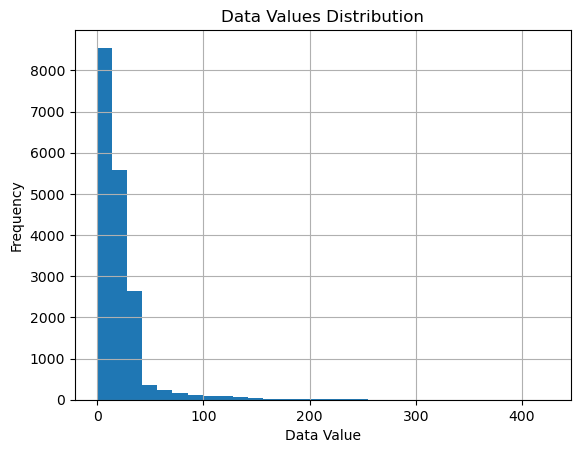

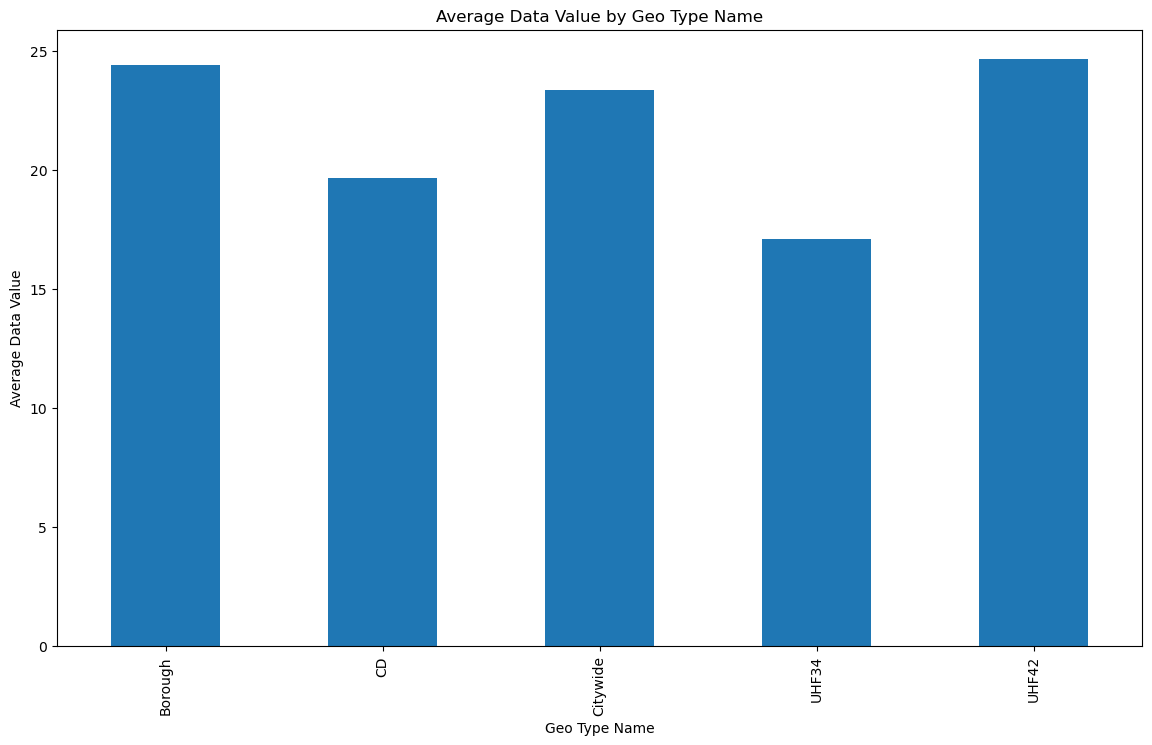

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Data Value'].hist(bins=30)
plt.title("Data Values Distribution")
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(14,8))
df.groupby('Geo Type Name')['Data Value'].mean().plot(kind='bar')
plt.title('Average Data Value by Geo Type Name')
plt.ylabel('Average Data Value')
plt.xticks(rotation=90)
plt.show()


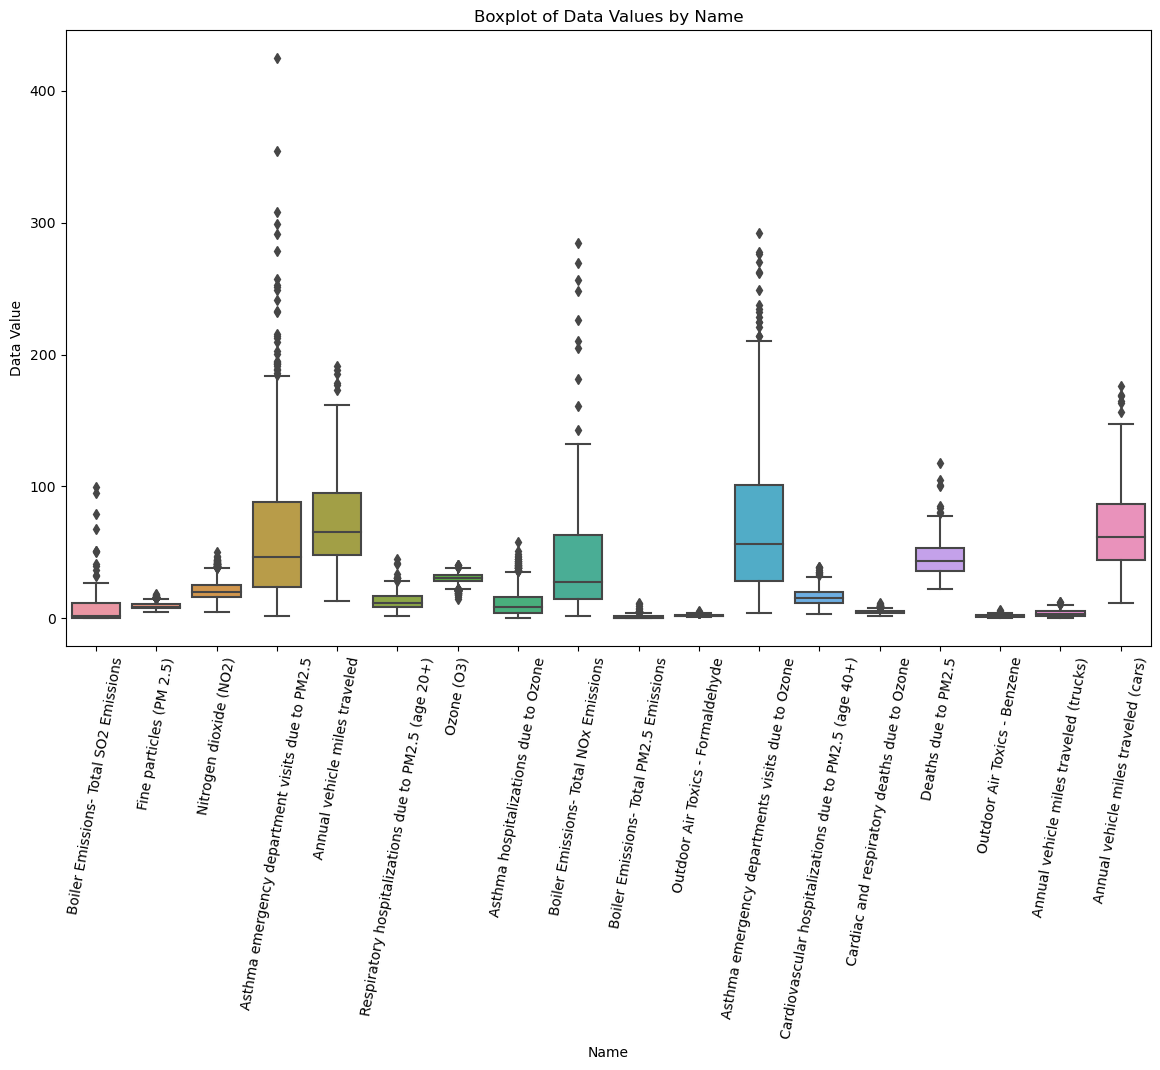

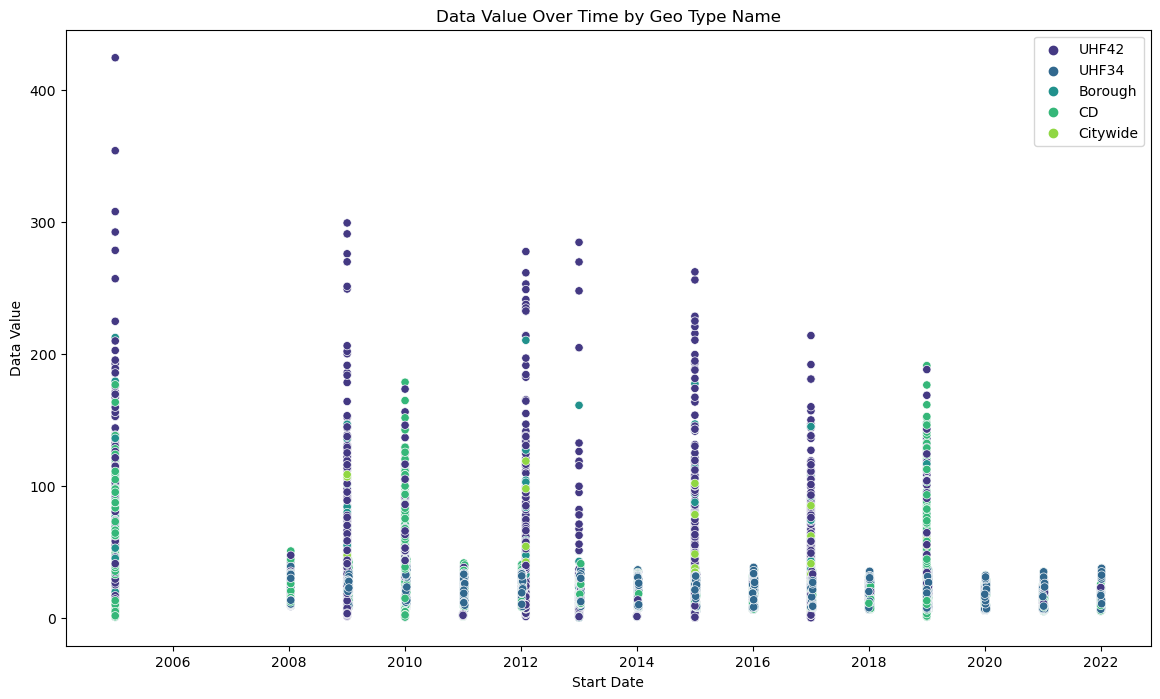

In [6]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Name', y='Data Value', data=df)
plt.title('Boxplot of Data Values by Name')
plt.xticks(rotation=80)  # Rotate x-axis labels for better readability
plt.show()



plt.figure(figsize=(14, 8))
sns.scatterplot(x='Start_Date', y='Data Value', hue='Geo Type Name', data=df, palette='viridis')
plt.title('Data Value Over Time by Geo Type Name')
plt.xlabel('Start Date')
plt.ylabel('Data Value')
plt.legend(loc='upper right')
plt.show()

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_352\1195640322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


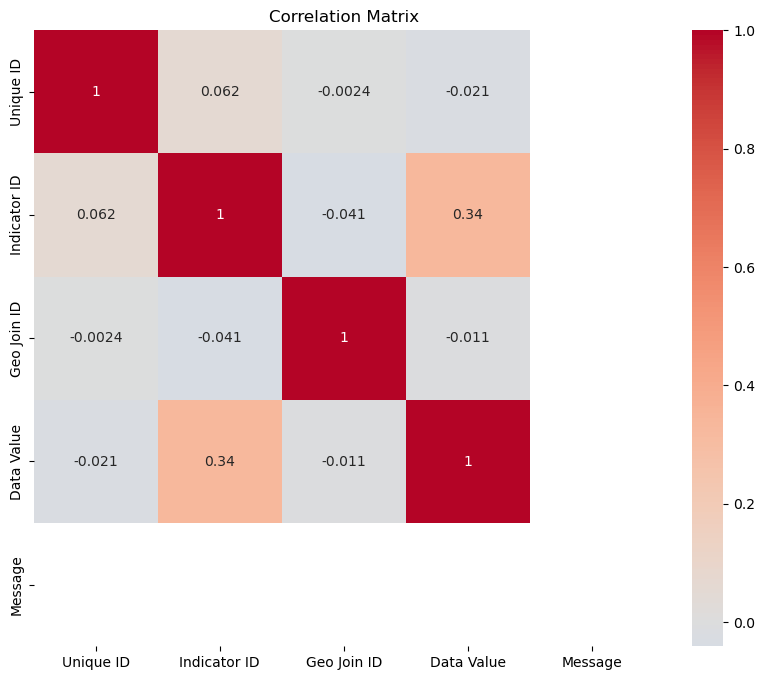

       Unique ID  Indicator ID  \
189       131424           648   
305       130419           640   
447       131456           648   
612       131369           657   
679       628491           657   
...          ...           ...   
17755     816976           644   
17996     151695           644   
17998     154541           644   
18009     154503           644   
18013     151696           644   

                                                  Name  \
189    Asthma emergency department visits due to PM2.5   
305              Boiler Emissions- Total SO2 Emissions   
447    Asthma emergency department visits due to PM2.5   
612    Asthma emergency department visits due to PM2.5   
679    Asthma emergency department visits due to PM2.5   
...                                                ...   
17755             Annual vehicle miles traveled (cars)   
17996             Annual vehicle miles traveled (cars)   
17998             Annual vehicle miles traveled (cars)   
18009      

In [8]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

from scipy.stats import zscore

# Calculate z-scores
df['Z-Score'] = zscore(df['Data Value'])

# Identify outliers
outliers = df[df['Z-Score'].abs() > 3]
print(outliers)

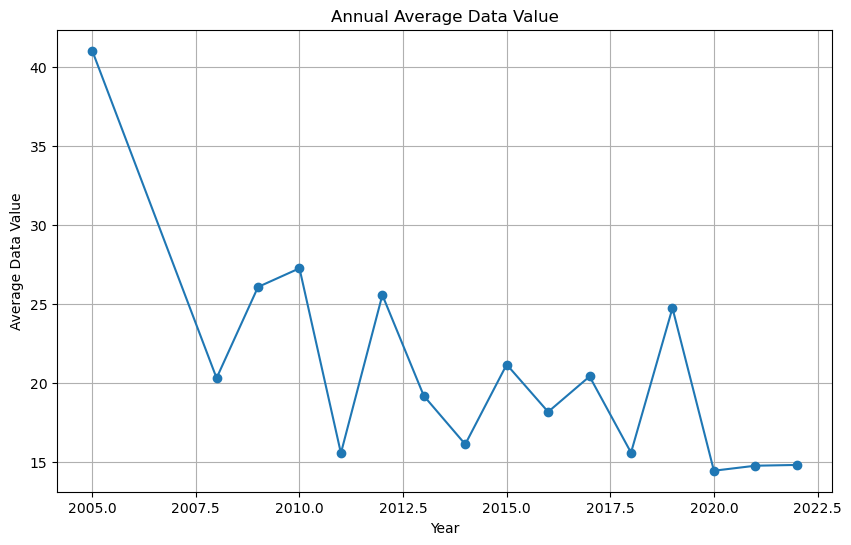

In [9]:
df['Year'] = df['Start_Date'].dt.year

# Calculate annual mean of Data Value
annual_mean = df.groupby('Year')['Data Value'].mean().reset_index()

# Plot annual mean
plt.figure(figsize=(10, 6))
plt.plot(annual_mean['Year'], annual_mean['Data Value'], marker='o')
plt.title('Annual Average Data Value')
plt.xlabel('Year')
plt.ylabel('Average Data Value')
plt.grid(True)
plt.show()